<a href="https://colab.research.google.com/github/Jacquedelest/Sales-Retail/blob/master/Data_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load dataset into dataframe

In [139]:
sales_raw = pd.read_csv('sales_data_sample.csv', parse_dates=True, encoding="ISO-8859-1")
sales_raw.head()

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
0        10107               30  ...              Kwai     Small
1        10121               34  ...              Paul     Small
2        10134               41  ...            Daniel    Medium
3        10145               45  ...             Julie    Medium
4        10159               49  ...             Julie    Medium

[5 rows x 25 columns]

In [162]:
sales_raw.tail()

Order Number  Order Quantity  ...                Address      Contact Name
2818         10350              20  ...     C/ Moralzarzal, 86      Diego Freyre
2819         10373              29  ...            Torikatu 38  Pirkko Koskitalo
2820         10386              43  ...     C/ Moralzarzal, 86      Diego Freyre
2821         10397              34  ...  1 rue Alsace-Lorraine    Annette Roulet
2822         10414              47  ...     8616 Spinnaker Dr.      Juri Yoshido

[5 rows x 23 columns]

This dataset is originally written by María Carina Roldán, Pentaho Community Member, BI consultant (Assert Solutions), Argentina. This work is licensed under the Creative Commons Attribution-Noncommercial-Share Alike 3.0 Unported License. Modified by Gus Segura June 2014.

# Descriptive Statistics with Pandas and Numpy

See information about dataframe including the index datatype and columns, non-null values, and memory usage.

In [95]:
sales_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order Number        2823 non-null   int64  
 1   Order Quantity      2823 non-null   int64  
 2   Unit Price          2823 non-null   float64
 3   Order Line Number   2823 non-null   int64  
 4   Sales               2823 non-null   float64
 5   Order Date          2823 non-null   object 
 6   Shipping Status     2823 non-null   object 
 7   QTR ID              2823 non-null   int64  
 8   Month               2823 non-null   object 
 9   Year                2823 non-null   int64  
 10  Product Line        2823 non-null   object 
 11  MSRP                2823 non-null   int64  
 12  Product Code        2823 non-null   object 
 13  Customer Name       2823 non-null   object 
 14  Phone Number        2823 non-null   object 
 15  City                2823 non-null   object 
 16  State 

Check missing value of dataframe columns

In [12]:
sales_raw.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Show descriptive statistic of datafame

In [13]:
#descriptive statistic of numeric columns
sales_raw.describe()

ORDERNUMBER  QUANTITYORDERED  ...     YEAR_ID         MSRP
count   2823.000000      2823.000000  ...  2823.00000  2823.000000
mean   10258.725115        35.092809  ...  2003.81509   100.715551
std       92.085478         9.741443  ...     0.69967    40.187912
min    10100.000000         6.000000  ...  2003.00000    33.000000
25%    10180.000000        27.000000  ...  2003.00000    68.000000
50%    10262.000000        35.000000  ...  2004.00000    99.000000
75%    10333.500000        43.000000  ...  2004.00000   124.000000
max    10425.000000        97.000000  ...  2005.00000   214.000000

[8 rows x 9 columns]

**count** is number of non-null values.

**mean** (average) is the value obtained by dividing the sum of several quantities by their number.

**std** (standard deviation) is a measure of the amount of variation or dispersion of a set of values.

**min** is smallest value of each columns.

**25%** is value at the 25 percentile.

**50%** (median) is value at the 50% percentile.

**75** is value at the 75 percentile.

**max** is largest value of each columns.

A **percentile** (centile) is a score below which a given percentage of scores in its frequency distribution falls (exclusive definition) or a score *at or below which* a given percentage falls (inclusive definition).

In [14]:
#descriptive statistic of object columns
sales_raw.describe(include='O')

ORDERDATE   STATUS  ... CONTACTFIRSTNAME DEALSIZE
count              2823     2823  ...             2823     2823
unique              252        6  ...               72        3
top     11/14/2003 0:00  Shipped  ...            Diego   Medium
freq                 38     2617  ...              259     1384

[4 rows x 16 columns]

**count** is number of non-null values.

**unique** is number of unique values.

**top** is the most common occurring value. In other words, **top** is **mode**.

**freq** is the most common value's frequency.

In [163]:
#quantile statistics of numeric columns
sales_quantiles = sales_raw.quantile([0.25, 0.5, 0.75])
print('Quantile Statistic of Dataframe:')
sales_quantiles

Quantile Statistic of Dataframe:


Order Number  Order Quantity  Unit Price  ...  QTR ID    Year   MSRP
0.25       10180.0            27.0       68.86  ...     2.0  2003.0   68.0
0.50       10262.0            35.0       95.70  ...     3.0  2004.0   99.0
0.75       10333.5            43.0      100.00  ...     4.0  2004.0  124.0

[3 rows x 8 columns]

**Quantile** is each of any set of values of a variate which divide a frequency distribution into equal groups, each containing the same fraction of the total population.

See pairwise correlation between numeric columns



**Pearson’s Correlation Coefficient** also called **product-moment correlation coefficient** or simply **Pearson’s ρ** measures the degree of correlation (and the direction of this correlation — whether positive or negative) between two variables. This coefficient, usually represented by *ρ*, only assumes values between -1 and 1.

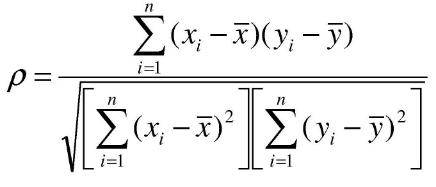

Interpreting the value of *ρ*

  0.9 to 1 positive or negative indicates a **very strong correlation**

  0.7 to 0.9 positive or negative indicates a **strong correlation**

  0.5 to 0.7 positive or negative indicates a **moderate correlation**

  0.3 to 0.5 positive or negative indicates a **weak correlation**
  
  0 to 0.3 positive or negative indicates a **negligible correlation**

In [16]:
print('Correlation between numeric columns with Standard Correlation Coefficient')
sales_raw.corr(method='pearson')

Correlation between numeric columns with Standard Correlation Coefficient


ORDERNUMBER  QUANTITYORDERED  ...   YEAR_ID      MSRP
ORDERNUMBER         1.000000         0.065543  ...  0.904596 -0.010280
QUANTITYORDERED     0.065543         1.000000  ...  0.069535  0.017881
PRICEEACH          -0.002935         0.005564  ... -0.005938  0.670625
ORDERLINENUMBER    -0.055550        -0.018397  ... -0.057367 -0.021067
SALES               0.039919         0.551426  ...  0.035647  0.635239
QTR_ID             -0.051383        -0.035323  ... -0.433052  0.010234
MONTH_ID           -0.039723        -0.039048  ... -0.430163  0.008170
YEAR_ID             0.904596         0.069535  ...  1.000000 -0.014310
MSRP               -0.010280         0.017881  ... -0.014310  1.000000

[9 rows x 9 columns]

In [17]:
print('Visualization of correlation between numeric columns with Standard Correlation Coefficient')
sales_raw.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

Visualization of correlation between numeric columns with Standard Correlation Coefficient


# Descriptive Statistics with Profile Report from Pandas Profiling

In [18]:
from pandas_profiling import ProfileReport
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (34.6 MB)


In [19]:
sales_report = ProfileReport(sales_raw)
sales_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleansing



Rename dataframe columns

In [141]:
sales_raw.rename(columns={
    'ORDERNUMBER' : 'Order Number',
    'QUANTITYORDERED' : 'Order Quantity',
    'PRICEEACH' : 'Unit Price',
    'ORDERLINENUMBER' : 'Order Line Number',
    'SALES' : 'Sales',
    'ORDERDATE' : 'Order Date',
    'STATUS' : 'Shipping Status',
    'QTR_ID' : 'QTR ID',
    'MONTH_ID' : 'Month',
    'YEAR_ID' : 'Year',
    'PRODUCTLINE' : 'Product Line',
    'MSRP' : 'MSRP',
    'PRODUCTCODE' : 'Product Code',
    'CUSTOMERNAME' : 'Customer Name',
    'PHONE' : 'Phone Number',
    'ADDRESSLINE1' : 'Address Line',
    'ADDRESSLINE2' : 'Address Line 2',
    'CITY' : 'City',
    'STATE' : 'State',
    'POSTALCODE' : 'Postal Code',
    'COUNTRY' : 'Country',
    'TERRITORY' : 'Territory',
    'CONTACTLASTNAME' : 'Contact Last Name',
    'CONTACTFIRSTNAME' : 'Contact First Name',
    'DEALSIZE' : 'Deal Size'
    }, 
    inplace=True)
sales_raw.head()

Order Number  Order Quantity  ...  Contact First Name  Deal Size
0         10107              30  ...                Kwai      Small
1         10121              34  ...                Paul      Small
2         10134              41  ...              Daniel     Medium
3         10145              45  ...               Julie     Medium
4         10159              49  ...               Julie     Medium

[5 rows x 25 columns]

Inspect unique values of categorical columns

In [185]:
print('Unique value of Month\n', sales_raw['Month'].unique())
print('\nUnique value of Year\n', sales_raw['Year'].unique())
print('\nUnique value of Product Line\n', sales_raw['Product Line'].unique())
print('\nUnique value of Shipping Status\n', sales_raw['Shipping Status'].unique())

Unique value of Month
 ['February' 'May' 'July' 'August' 'October' 'November' 'December'
 'January' 'April' 'June' 'September' 'March']

Unique value of Year
 [2003 2004 2005]

Unique value of Product Line
 ['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']

Unique value of Shipping Status
 ['Shipped' 'Disputed' 'In Process' 'Cancelled' 'On Hold' 'Resolved']


Rename values of month

In [142]:
sales_raw['Month'] = sales_raw['Month'].replace({1 : 'January',
                                                 2 : 'February',
                                                 3 : 'March',
                                                 4 : 'April',
                                                 5 : 'May',
                                                 6 : 'June',
                                                 7 : 'July',
                                                 8 : 'August',
                                                 9 : 'September',
                                                 10 : 'October',
                                                 11 : 'November',
                                                 12 : 'December'}
                                                )
sales_raw.head()

Order Number  Order Quantity  ...  Contact First Name  Deal Size
0         10107              30  ...                Kwai      Small
1         10121              34  ...                Paul      Small
2         10134              41  ...              Daniel     Medium
3         10145              45  ...               Julie     Medium
4         10159              49  ...               Julie     Medium

[5 rows x 25 columns]

In [143]:
sales_raw['Address'] = np.where(sales_raw['Address Line 2'].isna(), sales_raw['Address Line'], sales_raw['Address Line'] + ', ' + sales_raw['Address Line 2'])
sales_raw.tail(5)

Order Number  Order Quantity  ...  Deal Size                Address
2818         10350              20  ...      Small     C/ Moralzarzal, 86
2819         10373              29  ...     Medium            Torikatu 38
2820         10386              43  ...     Medium     C/ Moralzarzal, 86
2821         10397              34  ...      Small  1 rue Alsace-Lorraine
2822         10414              47  ...     Medium     8616 Spinnaker Dr.

[5 rows x 26 columns]

Delete columns `Address Line` and `Address Line 2` from dataframe

In [144]:
sales_raw = sales_raw.drop(columns=['Address Line', 'Address Line 2'])
sales_raw.head()

Order Number  Order Quantity  ...  Deal Size                        Address
0         10107              30  ...      Small        897 Long Airport Avenue
1         10121              34  ...      Small             59 rue de l'Abbaye
2         10134              41  ...     Medium  27 rue du Colonel Pierre Avia
3         10145              45  ...     Medium             78934 Hillside Dr.
4         10159              49  ...     Medium                7734 Strong St.

[5 rows x 24 columns]

Create a new column `Contact Name` from `Contact First Name` and `Contact Last Name`

In [145]:
sales_raw['Contact Name'] = np.where(sales_raw['Contact First Name'].isna(), 
                                     sales_raw['Contact Last Name'].isna(), 
                                     sales_raw['Contact First Name'] + ' ' + sales_raw['Contact Last Name'])
sales_raw.tail(5)

Order Number  Order Quantity  ...                Address      Contact Name
2818         10350              20  ...     C/ Moralzarzal, 86      Diego Freyre
2819         10373              29  ...            Torikatu 38  Pirkko Koskitalo
2820         10386              43  ...     C/ Moralzarzal, 86      Diego Freyre
2821         10397              34  ...  1 rue Alsace-Lorraine    Annette Roulet
2822         10414              47  ...     8616 Spinnaker Dr.      Juri Yoshido

[5 rows x 25 columns]

Delete columns `Contact Last Name` and `Contact First Name` from dataframe

In [146]:
sales_raw = sales_raw.drop(columns=['Contact Last Name', 'Contact First Name'])
sales_raw.head()

Order Number  Order Quantity  ...                        Address     Contact Name
0         10107              30  ...        897 Long Airport Avenue          Kwai Yu
1         10121              34  ...             59 rue de l'Abbaye     Paul Henriot
2         10134              41  ...  27 rue du Colonel Pierre Avia  Daniel Da Cunha
3         10145              45  ...             78934 Hillside Dr.      Julie Young
4         10159              49  ...                7734 Strong St.      Julie Brown

[5 rows x 23 columns]

Check missing value

In [191]:
print('Is there any missing value?')
print(sales_raw.isnull().any())

Is there any missing value?
Order Quantity       False
Unit Price           False
Order Line Number    False
Sales                False
Order Date           False
Shipping Status      False
QTR ID               False
Month                False
Year                 False
Product Line         False
MSRP                 False
Product Code         False
Customer Name        False
Phone Number         False
City                 False
State                 True
Postal Code           True
Country              False
Territory            False
Deal Size            False
Address              False
Contact Name         False
dtype: bool


Handle missing values

In [190]:
#filling missing values of column territory with `NA` (North America)
sales_raw['Territory'] = sales_raw['Territory'].fillna('NA')

In [159]:
#drop missing values of column state
sales_raw['State'] = sales_raw['State'].dropna()

In [160]:
#drop missing values of column postal code
sales_raw['Postal Code'] = sales_raw['Postal Code'].dropna()

Check columns that have outliers with boxplot

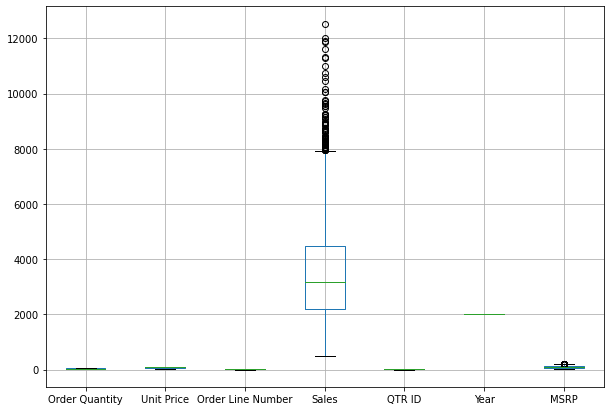

In [199]:
fig = plt.figure(figsize =(10, 7))
sales_raw.boxplot()
plt.show()

Handle outliers from dataframe

Remove outliers from column order quantity

In [175]:
#check shape of dataframe before removing outliers
print('Shape before removing outlier: ', sales_raw.shape)

#Q1, Q3, and IQR
Q1 = sales_raw['Order Quantity'].quantile(0.25)
Q3 = sales_raw['Order Quantity'].quantile(0.75)
IQR = Q3 - Q1
#removing outliers
sales_raw = sales_raw[~((sales_raw['Order Quantity'] < (Q1-1.5*IQR)) | (sales_raw['Order Quantity'] > (Q3+1.5*IQR)))]

#check shape of dataframe after removing outliers
print('Shape after removing outlier: ', sales_raw.shape)

Shape before removing outlier:  (2815, 23)
Shape after removing outlier:  (2815, 23)


Remove outliers from column unit price

In [174]:
#check shape of dataframe before removing outlier
print('Shape before removing outlier: ', sales_raw.shape)

#Q1, Q3, and IQR
Q1 = sales_raw['Unit Price'].quantile(0.25)
Q3 = sales_raw['Unit Price'].quantile(0.75)
IQR = Q3 - Q1
#removing outliers
sales_raw = sales_raw[~((sales_raw['Unit Price'] < (Q1-1.5*IQR)) | (sales_raw['Unit Price'] > (Q3+1.5*IQR)))]

#check shape of dataframe after removing outliers
print('Shape after removing outlier: ', sales_raw.shape)

Shape before removing outlier:  (2815, 23)
Shape after removing outlier:  (2815, 23)


Deduplicate dataframe

In [177]:
#check shape of dataframe before removing duplicates
print('Shape before removing duplicates: ', sales_raw.shape)

#remove duplicates
sales_raw.drop_duplicates(inplace=True)

#check shape of dataframe after removing duplicates
print('Shape after removing duplicates: ', sales_raw.shape)

Shape before removing duplicates:  (2815, 23)
Shape after removing duplicates:  (2815, 23)


In [186]:
sales_raw = sales_raw.set_index('Order Number')
sales_raw.head()

Order Quantity  ...     Contact Name
Order Number                  ...                 
10107                     30  ...          Kwai Yu
10121                     34  ...     Paul Henriot
10134                     41  ...  Daniel Da Cunha
10145                     45  ...      Julie Young
10159                     49  ...      Julie Brown

[5 rows x 22 columns]

# Save clean data

In [187]:
sales_raw.to_csv('sales_clean.csv', header=True)